In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [299,299]

train_path = './archive/train/'
valid_path = './archive/test/'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('./archive/train/*')

In [6]:
folders

['./archive/train\\angry',
 './archive/train\\disgusted',
 './archive/train\\fearful',
 './archive/train\\happy',
 './archive/train\\neutral',
 './archive/train\\sad',
 './archive/train\\surprised']

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
training_set = train_datagen.flow_from_directory('./archive/train/',
                                                 target_size = (299, 299),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [16]:
test_set = test_datagen.flow_from_directory('./archive/test/',
                                            target_size = (299, 299),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Sammy LS\AppData\Local\Temp\ipykernel_2084\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10


1795/1795 [==============================] - 966s 536ms/step - loss: 13.6646 - accuracy: 0.4041 - val_loss: 13.0438 - val_accuracy: 0.4680
Epoch 2/10
1795/1795 [==============================] - 970s 541ms/step - loss: 14.4489 - accuracy: 0.4691 - val_loss: 14.0209 - val_accuracy: 0.4939
Epoch 3/10
1795/1795 [==============================] - 967s 539ms/step - loss: 14.5372 - accuracy: 0.4957 - val_loss: 14.5824 - val_accuracy: 0.5049
Epoch 4/10
1795/1795 [==============================] - 970s 540ms/step - loss: 13.7889 - accuracy: 0.5238 - val_loss: 18.4233 - val_accuracy: 0.4909
Epoch 5/10
1795/1795 [==============================] - 962s 536ms/step - loss: 13.9213 - accuracy: 0.5382 - val_loss: 17.7300 - val_accuracy: 0.4870
Epoch 6/10
1795/1795 [==============================] - 974s 542ms/step - loss: 13.2284 - accuracy: 0.5541 - val_loss: 18.1120 - val_accuracy: 0.4879
Epoch 7/10
1795/1795 [==============================] - 964s 537ms/step - loss: 13.5197 - accuracy

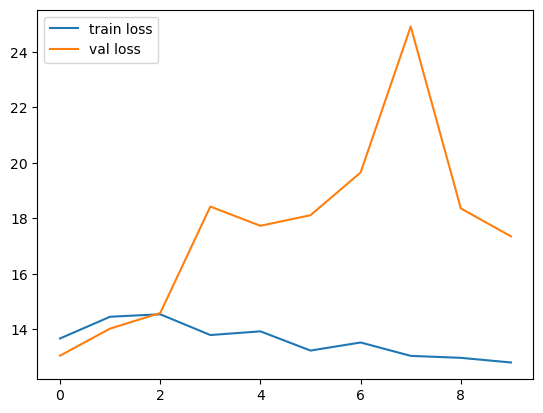

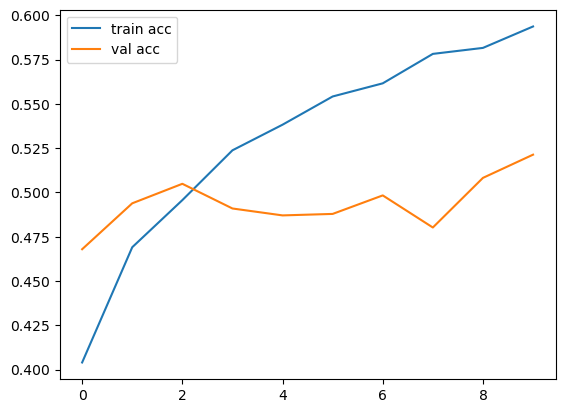

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')